# **Computational Drug Discovery - SOAT-2 : Comparing Regressors Part 05**

khalid El Akri

['Chem Code Professor' YouTube channel](http://youtube.com/@chemcodeprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the Bindingdb bioactivity data.

In **Part 05**, we will be comparing several Machine Learning algorithms for build regression models of SOAT-2 inhibitors.

## **1. Import libraries**

In [1]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**

In [4]:
df = pd.read_csv('soat_2_bioa_data_preprocessed_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.05
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.05
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.05
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.05
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.73
214,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.64
215,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.64
216,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.38


In [5]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [6]:
# Examin X dimension
X.shape

(218, 881)

In [7]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(218, 142)

In [8]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [9]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:15<00:00,  2.73it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:14<00:00,  2.80it/s]


In [10]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.45,0.90,0.49,0.05
ExtraTreeRegressor,0.45,0.90,0.49,0.02
DecisionTreeRegressor,0.45,0.90,0.49,0.05
ExtraTreesRegressor,0.45,0.90,0.49,0.28
XGBRegressor,0.45,0.90,0.49,0.23
RandomForestRegressor,0.37,0.89,0.52,0.33
GradientBoostingRegressor,0.34,0.88,0.53,0.20
BaggingRegressor,0.30,0.87,0.55,0.04
Ridge,0.24,0.86,0.57,0.03


In [11]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,32528768522137317700747238048119418942657423413...,-7489181589980451879982157677112311132007631265...,1286783781399410637190375659357991862272.00,0.12
LinearRegression,17704435360002173000744960.00,-40761374433493374948343808.00,9493203871769.68,0.05
TransformedTargetRegressor,17704435360002173000744960.00,-40761374433493374948343808.00,9493203871769.68,0.03
KernelRidge,8.30,-15.81,6.10,0.02
GaussianProcessRegressor,2.83,-3.22,3.06,0.06
PassiveAggressiveRegressor,1.78,-0.79,1.99,0.02
RANSACRegressor,1.74,-0.70,1.94,0.66
QuantileRegressor,1.51,-0.17,1.61,0.62
DummyRegressor,1.48,-0.11,1.56,0.02


## **5. Data visualization of model performance**

[(0.0, 1.0)]

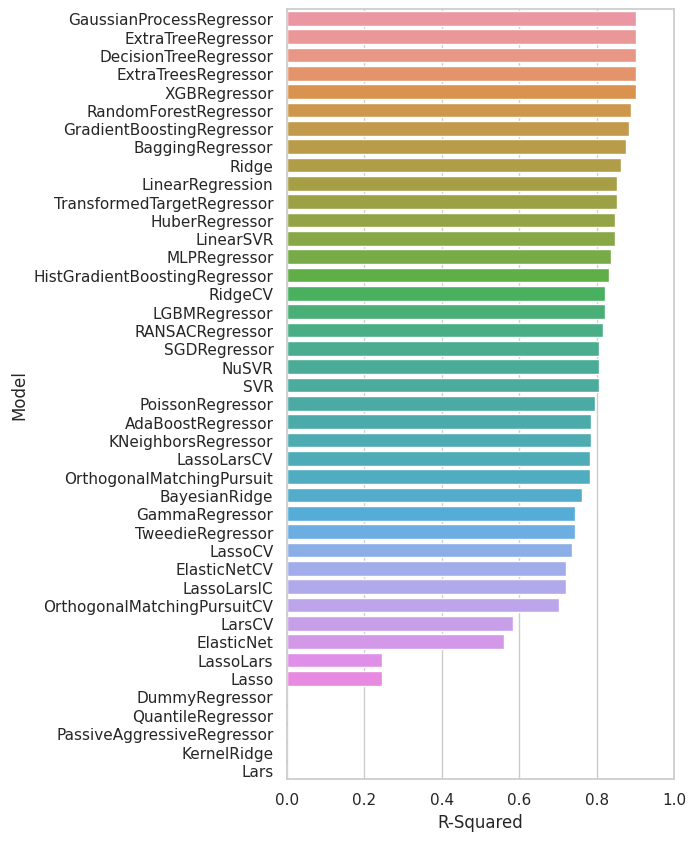

In [13]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

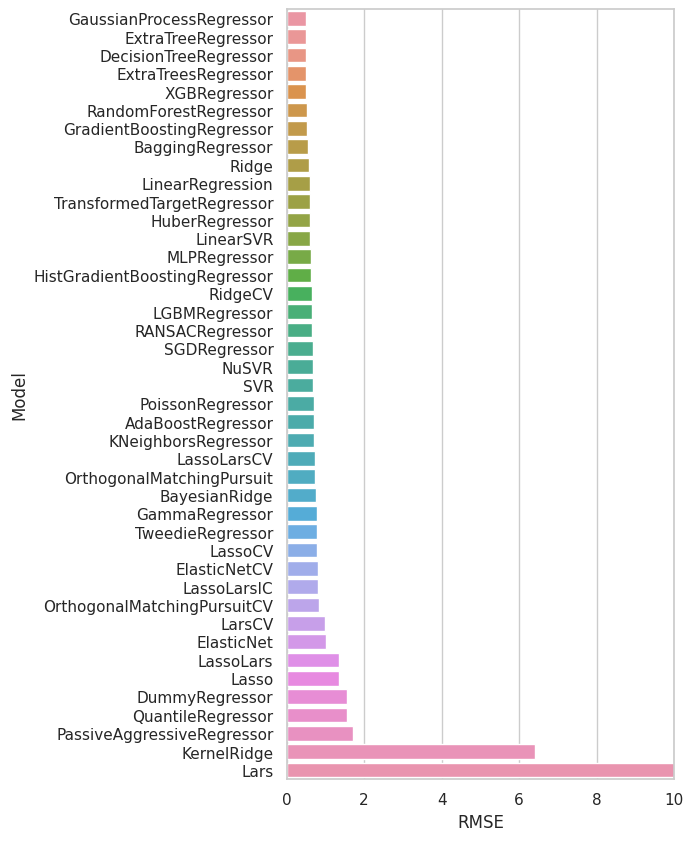

In [15]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

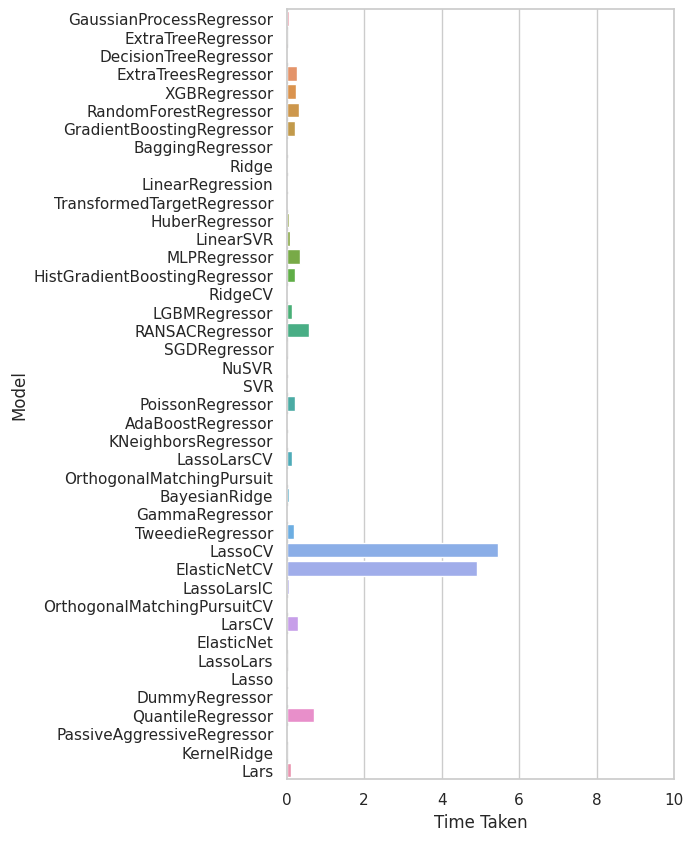

In [16]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))